# Bedingte Wahrscheinlichkeiten für AWGN-Kanal

Bedingte Wahrscheinlichkeiten bzw. Wahrscheinlichkeitsdichten spielen in der Nachrichtentechnik, aber auch allgemein in der statistischen Signalverarbeitung und das maschinelle Lernen eine wichtige Rolle. In diesem Jupyter-Notebook sollen daher einige Grundlagen anschaulich dargestellt werden.

## Kontinuierliches Informationssignal

Bei der Übertragung von Daten über einen AWGN-Kanal wird das Informationssignal $x$ mit weißem gaußverteiltem Rauschen $n$ additiv überlagert, das Empfangssignal lautet also 

\begin{equation}
  y = x + n \; .
\end{equation}

Üblicherweise sind Informationssignal und Rauschen voneinander statistisch unabhängig, weshalb die Dichte des Empfangssignals aus der Faltung der Dichten von Informationssignal und Rauschen hervorgeht und

\begin{equation}
  p_{\cal y}(\xi) = p_{\cal X}(\xi) \ast p_{\cal N}(\xi) 
\end{equation}

gilt. Die Likelihood-Funktion ist eine bedingte Wahrscheinlichkeitsdichte bzgl. $y$

\begin{equation}
  p_{{\cal Y} \mid {\cal X}=x}(y) = p_{\cal N}(y-x) 
  = \frac{p_{{\cal Y}, {\cal X}}(y,x)}{p_{\cal X}(x)}
\end{equation}

und entspricht der Dichte des Rauschens an der Stelle $y-x$. Es ist zu beachten, dass die Likelihood-Funktion nur bezüglich $y$ eine reguläre Wahrscheinlichkeitsdichtefunktion darstellt (Integral ergibt den Wert 1). Bezüglich des Signals $x$ stellt $p_{{\cal Y} \mid {\cal X}=x}(y)$ keine Dichte dar, da die Summe über alle Werte von $x$ nicht den Wert Eins ergibt. Die Likelihood-Funktion kann über die Regel von Bayes in die A-Posteriori-Wahrscheinlichkeitsdichte 

\begin{equation}
  p_{{\cal X} \mid {\cal Y}=y}(x)
  = \frac{p_{{\cal X}, {\cal Y}}(x,y)}{p_{\cal Y}(y)}
  = p_{{\cal Y} \mid {\cal X}=x}(y) \cdot \frac{p_{\cal X}(x)}{p_{\cal Y}(y)}  
\end{equation}

überführt werden. Für ein mittelwertfreies, gaußverteiltes Informationssignal $x(t)$ ist die A-Posteriori-Wahrscheinlichkeitsdichte ebenfalls eine Gaußverteilung mit den Parametern

\begin{align}
  \mu_{{\cal X} \mid y} &= \frac{\gamma}{\gamma+1} \cdot y \\
  \sigma_{{\cal X} \mid y}^2 &= \frac{\sigma_{\cal X}^2}{\gamma+1} \; .
\end{align}


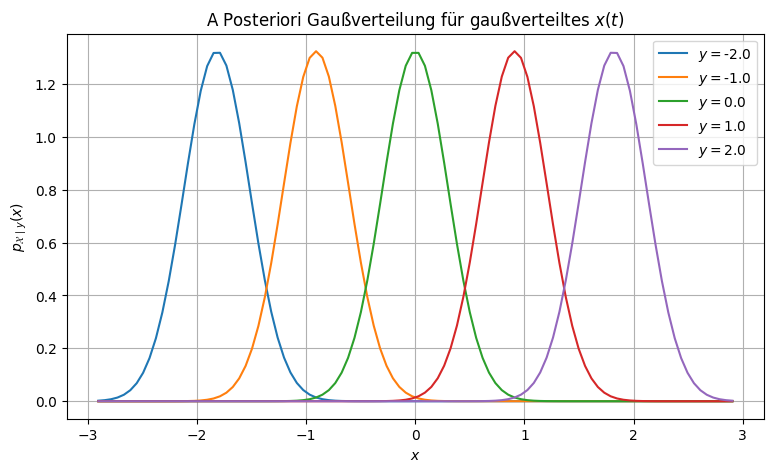

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# real gaussian distribution
# number of samples
N = 100
# variance
sigma2_N = 0.1

# variance of X
sigma2_X = 1.0
# received values
y = np.array((-2.0,-1.0,0.0,1.0,2.0))
# SNR
gamma = sigma2_X / sigma2_N
# conditional mean
mu_X_y = gamma / (gamma+1) * y
#conditional variance
sigma2_X_y = sigma2_X / (gamma+1)
# a posteriori densities
n_max = np.max(y) + 3.0*np.sqrt(sigma2_X_y)
n_real_app = np.linspace(-n_max,n_max,N)
X,Y = np.meshgrid(n_real_app,mu_X_y)
pdf_x_y = np.exp(-(X-Y)**2/2/sigma2_X_y) / np.sqrt(2. * np.pi * sigma2_X_y)

fig_app_gaussian = plt.figure(figsize=(9,5))
ax3 = fig_app_gaussian.add_subplot(111)
for run_y in np.arange(len(y)):
    ax3.plot(n_real_app, pdf_x_y[run_y,:],label='$y=$%.1f' %(y[run_y]))
plt.xlabel('$x$')
plt.ylabel('$p_{{\cal X} \mid y}(x)$')
plt.title('A Posteriori Gaußverteilung für gaußverteiltes $x(t)$')
plt.grid(True)
plt.legend()
plt.show()

Dem obigen Bild ist zu entnehmen, dass der Mittelwert der A-Posteriori-Wahrscheinlichkeiten vom Empfangswert $y$ abhängt. Dies bedeutet, dass $y$ eine Information darüber enthält, in welchem Wertebereich sich die gesuchte Größe $x$ wahrscheinlich befindet.

## Diskretes Informationssignal (BPSK)

Für ein BPSK-moduliertes Signal mit den Symbolen $\mathbb{X}=\{-1,+1\}$ und den Auftrittswahrscheinlichkeiten $P_{-1}$ und $P_{+1}=1-P_{-1}$ lauten die Likelihood-Funktionen

\begin{align}
  p_{{\cal Y} \mid x = \pm 1}(y) 
  &= \frac{1}{\sqrt{2 \pi \sigma_{\cal N}^2}} 
      \cdot e^{- \frac{(y+\mp 1)^2}{2 \sigma_{\cal N}^2}} \; .
\end{align}

Die Dichte des Empfangssignals ergibt sich nun zu

\begin{align}
  p_{\cal Y}(y) 
  &= P_{-1} \cdot p_{{\cal Y} \mid x=-1}(y) + P_{+1} \cdot p_{{\cal Y} \mid x=+1}(y) 
   = \frac{1-P_{+1}}{\sqrt{2 \pi \sigma_{\cal N}^2}} 
      \cdot e^{- \frac{(y+1)^2}{2 \sigma_{\cal N}^2}}
   + \frac{P_{+1}}{\sqrt{2 \pi \sigma_{\cal N}^2}} 
      \cdot e^{- \frac{(y-1)^2}{2 \sigma_{\cal N}^2}}  
\end{align}

Für das betrachtete binäre Alphabet $\mathbb{X}$ erhalten wir die beiden A-Posteriori-Wahrscheinlichkeiten 

\begin{align}
  \Pr\{ {\cal X} = +1 \mid y \} 
  &= \frac{p_{{\cal Y} \mid x=+1}(y) \cdot P_{+1}}{p_{\cal Y}(y)} 
   = \frac{p_{{\cal Y} \mid x=+1}(y) \cdot P_{+1}}
          {(1-P_{+1}) \cdot p_{{\cal Y} \mid x=-1}(y) 
            + P_{+1} \cdot p_{{\cal Y} \mid x=+1}(y) } \\
  &= \frac{ 1 }{ 1 + \frac{1-P_{+1}}{P_{+1}} \cdot 
                \frac{ p_{{\cal Y} \mid x=-1}(y)}{p_{{\cal Y} \mid x=+1}(y)} } 
   = \frac{1}{1 + \frac{1-P_{+1}}{P_{+1}} \cdot e^{- 2y / \sigma_{\cal N}^2} }
  \\
  \Pr\{ {\cal X} = -1 \mid y \} 
  &= \frac{p_{{\cal Y} \mid x=-1}(y) \cdot P_{-1}}{p_{\cal Y}(y)} 
   = \frac{p_{{\cal Y} \mid x=-1}(y) \cdot P_{-1}}
          {(1-P_{+1}) \cdot p_{{\cal Y} \mid x=-1}(y) 
            + P_{+1} \cdot p_{{\cal Y} \mid x=+1}(y) } \\
  &= \frac{1}{1 + \frac{P_{+1}}{1-P_{+1}} \cdot 
      \frac{p_{{\cal Y} \mid x=+1}(y)}{p_{{\cal Y} \mid x=-1}(y)} } 
   = \frac{1}{1 + \frac{P_{+1}}{1-P_{+1}} \cdot e^{2y / \sigma_{\cal N}^2} }
\end{align}

jeweils als Funktion des Empfangssignals $y$. Fasst man die Ausdrücke für $x=+1$ und $x=-1$ zusammen, erhält man

\begin{equation}
  \Pr\{ {\cal X} = x \mid y \} 
  = \frac{1}{1 + \left(\frac{1-P_{+1}}{P_{+1}}\right)^x \cdot e^{- 2xy / \sigma_{\cal N}^2} } \; .
\end{equation}

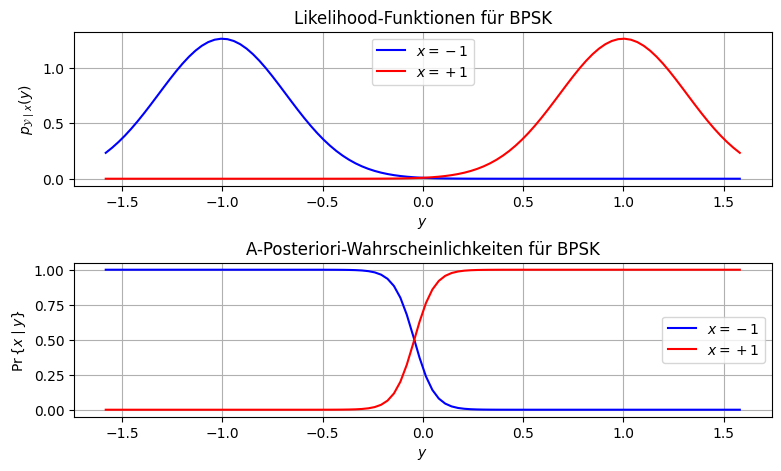

In [2]:
n_real = 5.0 * np.sqrt(sigma2_N) * np.linspace(-1,1,N)

# Likelihood functions for BPSK
pdf_y_x = np.zeros((len(n_real),2))
pdf_y_x[:,0] = np.exp(-(n_real+1)**2/2/sigma2_N) / np.sqrt(2*np.pi*sigma2_N)
pdf_y_x[:,1] = np.exp(-(n_real-1)**2/2/sigma2_N) / np.sqrt(2*np.pi*sigma2_N)

# a priori probability for +1
P_1 = 0.7
# a posteriori probabilities as functions of y
pdf_x_y = np.zeros((len(n_real),2))
# x = -1
pdf_x_y[:,0] = 1.0 / ( 1.0 + P_1/(1-P_1)*np.exp(2*n_real/sigma2_N) )
# x = -1
pdf_x_y[:,1] = 1.0 / ( 1.0 + (1-P_1)/P_1*np.exp(-2*n_real/sigma2_N) )


fig_app_BPSK = plt.figure(figsize=(9,5))
plt.subplots_adjust(hspace=0.5)

ax4 = fig_app_BPSK.add_subplot(211)
ax4.plot(n_real, pdf_y_x[:,0], 'b-', label='$x=-1$')
ax4.plot(n_real, pdf_y_x[:,1], 'r-', label='$x=+1$')
plt.xlabel('$y$')
plt.ylabel('$p_{{\cal Y} \mid x}(y)$')
plt.title('Likelihood-Funktionen für BPSK')
plt.grid(True)
plt.legend()

ax4 = fig_app_BPSK.add_subplot(212)
ax4.plot(n_real, pdf_x_y[:,0], 'b-', label='$x=-1$')
ax4.plot(n_real, pdf_x_y[:,1], 'r-', label='$x=+1$')
plt.xlabel('$y$')
plt.ylabel('$\Pr \{x \mid y\}$')
plt.title('A-Posteriori-Wahrscheinlichkeiten für BPSK')
plt.grid(True)
plt.legend()

plt.show()

Aus dem oberen der beiden Bilder ist deutlich zu entnehmen, dass die Likelihood-Funktionen der Gaußverteilung des Rauschens, jeweils verschoben zur Hypothese $x$, entsprechen. 

Das untere Bild illustriert, dass die A-Posteriori-Wahrscheinlichkeit für $x=+1$ mit wachsendem $y \to \infty$ gegen den Wert Eins läuft, während dies für $x=-1$ in der entgegengesetzten Richtung für $y \to - \infty$ passiert. Die A-Posteriori-Wahrscheinlichkeit ist das beste Maß, um aus dem Empfangswert $y$ auf den möglichen Sendewert $x$ zu schließen

\begin{equation}
    \hat{x} = \mathrm{argmax}_{\tilde{x}} \Pr \{ \tilde{x} \mid y \} \; .
\end{equation}

Der Schnittpunkt beider Kurven liegt nicht bei Null, wenn die Symbole $x = \pm 1$ nicht gleichwahrscheinlich sind, sich die A-Priori-Wahrscheinlichkeiten also unterscheiden.

## Komplexes Diskretes Informationssignal (QPSK)

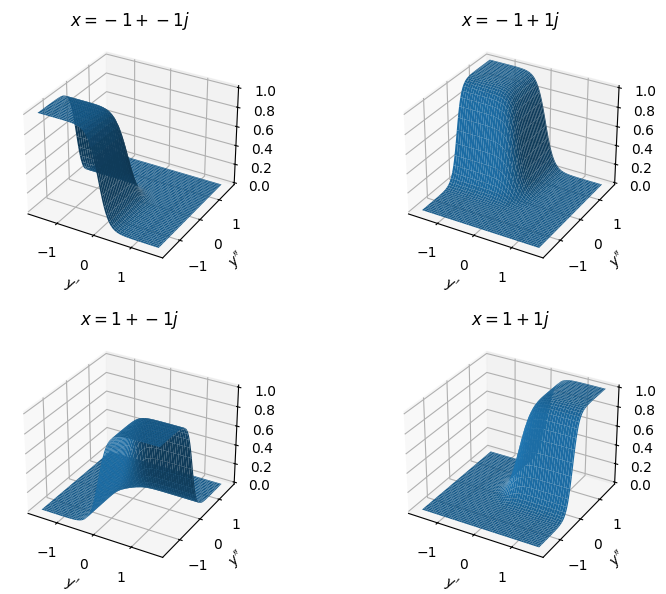

In [3]:
QPSK = ([-1-1j,-1+1j,1-1j,1+1j],[0.25,0.25,0.25,0.25])
sigma2_N = 0.5

nr,ni = np.meshgrid(n_real,n_real)
n_cmplx = (nr+1j*ni).flatten()
        
# determine p(y|x), p(y) and p(x|y)
pmf_y_x = np.zeros((len(n_cmplx),4))
pmf_x_y = np.zeros((len(n_cmplx),4))
pmf_y = np.zeros(len(n_cmplx))
cntrX = 0
for runx in QPSK[0]:
    tmp = np.exp(-np.abs(n_cmplx-runx)**2 / sigma2_N)
    pmf_y_x[:,cntrX] = tmp / np.sum(tmp)
    pmf_y += pmf_y_x[:,cntrX] * QPSK[1][cntrX]
    cntrX += 1

pmf_x_y = pmf_y_x * np.tile(QPSK[1],(len(n_cmplx),1)) / np.tile(pmf_y,(len(QPSK[0]),1)).transpose()

fig_app_QPSK = plt.figure(figsize=(9,7))
plt.subplots_adjust(hspace=0.25)

ax5 = fig_app_QPSK.add_subplot(221,projection='3d')
ax5.plot_surface(nr, ni, np.reshape(pmf_x_y[:,0],(len(n_real),len(n_real))))
plt.xlabel('$y^\prime$')
plt.ylabel('$y^{\prime \prime}$')
plt.title('$x=%g+%gj$' %(np.real(QPSK[0][0]),np.imag(QPSK[0][0])))
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.grid(True)

ax5 = fig_app_QPSK.add_subplot(222,projection='3d')
ax5.plot_surface(nr, ni, np.reshape(pmf_x_y[:,1],(len(n_real),len(n_real))))
plt.xlabel('$y^\prime$')
plt.ylabel('$y^{\prime \prime}$')
plt.title('$x=%g+%gj$' %(np.real(QPSK[0][1]),np.imag(QPSK[0][1])))
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.grid(True)

ax5 = fig_app_QPSK.add_subplot(223,projection='3d')
ax5.plot_surface(nr, ni, np.reshape(pmf_x_y[:,2],(len(n_real),len(n_real))))
plt.xlabel('$y^\prime$')
plt.ylabel('$y^{\prime \prime}$')
plt.title('$x=%g+%gj$' %(np.real(QPSK[0][2]),np.imag(QPSK[0][2])))
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.grid(True)

ax5 = fig_app_QPSK.add_subplot(224,projection='3d')
ax5.plot_surface(nr, ni, np.reshape(pmf_x_y[:,3],(len(n_real),len(n_real))))
plt.xlabel('$y^\prime$')
plt.ylabel('$y^{\prime \prime}$')
plt.title('$x=%g+%gj$' %(np.real(QPSK[0][3]),np.imag(QPSK[0][3])))
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.grid(True)

plt.show()

Den obigen Graphen ist zu entnehmen, dass die a-posteriori-Wahrscheinlichkeitsdichte auch im komplexen Fall die gleiche Interpretation erlaubt. Das komplexe Empfangssignal $y=y^\prime + j y^{\prime \prime}$ erlaubt eine sichere Detektion des QPSK-Symbols $x$, wenn sein Betrag groß ist. Dann befinden wir uns weit entfernt vom Ursprung in dem Quadranten der komplexen Ebene, in dem das gesendete QPSK-Symbol liegt. In der Nähe des Ursprungs sind hingegen alle vier a-posteriori-Wahrscheinlichkeiten gleich groß und eine Entscheidung sehr unsicher.